                                                            Introduction to Python
====================

                                                                  Python Basics
-------------

Let's look at some simple Python expressions first.

In [4]:
3+4 

7

Loops work like in other languages, but notice that Python indicates block structure by indentation.  This worries many people, but it is generally harmless and makes code look "less noisy".  Just be careful when you cut and paste and look up the editor command for indenting/outdenting the current selection (otherwise, it's painful).

In [5]:
i = 0 
while i<5:
    print i 
    i += 1 

0
1
2
3
4

Function definitions are made with the def keyword.

In [6]:
def fib(x): 
    if x<2: return x 
    return fib(x-1) + fib(x-2) 
fib(10) 

55

In [7]:
def quicksort(l):
    if len(l)<2: 
        return l
    pivot = l[0] 
    low = [x for x in l if x<pivot] 
    mid = [x for x in l if x==pivot] 
    high = [x for x in l if x>pivot] 
    return quicksort(low)+mid+quicksort(high) 
#You can get help and other information interactively.
quicksort([9,1,3,4,6,5]) 

[1, 3, 4, 5, 6, 9]

Python Development
==================

You can also write command line programs; that's important for a lot of pattern recognition problems, since you'll be dealing with many files, many CPUs, and long-running computations.

In [8]:
#!/usr/bin/python
# simple grep-like program

import os,sys,re

regex = re.compile(sys.argv[1])
stream = open(sys.argv[2])
for line in stream.readlines():
    line = line[:-1]
    if regex.search(line)>=0:
        print line

For argument parsing, use the optparse module.

The usual way of developing in Python is to experiment with APIs interactively, write small functions, then experiment with and test those functions, etc.  You can write Python like you write C as well (edit -> compile -> run, except you don't need the compile step), but that's less efficient.

For experimentation use the python or ipython commands.  They will prompt you with ">>>" and you can type away:

In [9]:
>>> 3+4
7
>>> import os
>>> os.popen("ls","r")
<open file 'ls', mode 'r' at 0xb29468>
>>>  help(os.popen)
Help on built-in function popen in module posix: popen(...)
    popen(command [, mode='r' [, bufsize]]) -> pipe}
    Open a pipe to/from a command returning a file object.
>>> 

SyntaxError: invalid syntax (<ipython-input-9-99c7cbd501a0>, line 5)

Some Python IDEs encourage interactive development, including Emacs and DrPython.  Others treat Python more like Java or C++.

# Getting Info

There are useful help functions.


In [ ]:
help(list) 

The dir(...) function shows all the attributes of its argument.  Attributes of the form `__foo__` usually have a special meaning to the Python interpreter.

In [10]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__delslice__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setslice__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

Object-Oriented Features
========================

Python is an object-oriented language.  Here is a simple class definition.

In [11]:
class Counter: 
    def __init__(self): 
        self.count = 0 
        def increment(self,by=1): 
            self.count += by 
            def reset(self,to=0): 
                self.count = 0 
                def report(self): 
                    return self.count 
                c = Counter() 
                c.increment() 
                c.increment() 
                print c.report() 
                c.reset() 
                print c.report() 
                c = Counter() 
                c.increment() 
                c.increment() 
                print c.report() 
                c.reset() print 
                c.report() 

  Note the following aspects of Python programming:

- single dispatch
- multiple inheritance
- self is an explicit arg
- constructor is `__init__`
- note use of default args (also works for functions)


Python Datatypes
================

Python has the usual scalar datatypes, plus strings.

In [1]:
print 1,type(1) 
print 1.0,int(1.0),type(1.0)
print "abc","abc"[1],type("abc") 

1 <type 'int'>
1.0 1 <type 'float'>
abc b <type 'str'>


Strings are immutable.

In [2]:
s = "abc" 
print s[1] 
s[1] = "x" 

TypeError: 'str' object does not support item assignment

b


Lists are denoted with [...] and are mutable.

In [3]:
l = [1,2,3] 
print l[1] 
print l 
l[1] = 99 
print l 

2
[1, 2, 3]
[1, 99, 3]


Tuples are similar to lists, are denoted with (...), and are immutable.

In [4]:
t = (1,2,3) 
print t[1] 
print t 
t[1] = 99 
print t 

TypeError: 'tuple' object does not support item assignment

2
(1, 2, 3)


Python supports parallel assignment with tuples.

In [5]:
x,y = (3,7)
print x

3


Parallel assignment also works for lists.

In [6]:
x,y = [3,7] 
print x 

3


Lists (and tuples) support iteration:

In [7]:
for x in [9,3,2,7]: print x 

9
3
2
7


Python also has a dictionary type; it is written using {...} and implemented as hash tables.

In [8]:
d = {1:1,2:4,3:9}
print d[1] 

1


Python Identity and Types
=========================

There are some more things you should know about Python types:

   + Assignment never copies, always passes references.
   + x==y tests for value equality
   + x is y tests for identity
   + isinstance(a,t) tests for whether a is of type t
   + int(x) converts to an int or raises an error
   + list(x) converts to a list or raises an error 
   + type(x) returns the type (e.g., str, list, tuple)

Let's look at that.

In [9]:
x = [1,2,3] 
y = x 
y[1] = 99 
x 

[1, 99, 3]

In [10]:
x is y 

True

In [11]:
x = [1,2,3] 
y = [1,2,3] 
print x is y 
print x==y 

False
True


In [12]:
print isinstance(3,list) 
print isinstance([],list) 

False
True


Errors and Exceptions
=====================

Python catches runtime errors (type errors, numerical errors, etc.) and lets you handle them in a way similar to Java and other languages.  Here is a simple example:

In [13]:
try:
    x = 1 + None 
except TypeError: 
    print "oops" 
else: 
    print "no oops" 
finally: print "finally" 

oops
finally


If you want to catch all exceptions, just use except:

Python guarantees to catch all type errors in Python code, which makes Python a safe and strongly typed language.

Iteration and for loops
=======================

Python's for loop always iterates over sequences.  In order to iterate over a range of numbers, use the range function.

In [14]:
for animal in ["lion","gazelle","Garfield"]: 
    print animal 

lion
gazelle
Garfield


 The range function takes three forms:

   + range(n) - integers from 0 to n-1
   + range(n,m) - integers counting up from n to m by 1, excluding m
   + range(n,m,d) - integers counting up from n to m by d, excluding m

In [15]:
for i in range(99,95,-1): 
    print i,"bottles of beer on the wall" 

99 bottles of beer on the wall
98 bottles of beer on the wall
97 bottles of beer on the wall
96 bottles of beer on the wall


Frequently, we want to iterate over a long sequence of items that gets generated somewhere else.  Storing the entire sequence in a list may take too much memory.  Python therefore provides iterators: just write a loop that generates the sequence you want and then yield the result.  Here is a simple illustration.

In [16]:
def fibonacci(): 
    a,b = (0,1) 
    while 1: 
        a,b = (b,a+b) 
        yield b 
       
for x in fibonacci(): 
    if x>1000: break
    print x 

1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


Note that you can yield tuples and then assign them with parallel assignment.

NumPy Arrays
============

Python has a rich and powerful numerical array facility.  Although at first glance, it may just seem like a Python-specific library, many of the concepts, conventions, and operations are common across many langauges, including Matlab and Fortran.  Many of the operations and notation originated in the APL programming language.

What makes many of these operations interesting is also that they are inherently parallel; they are an example of large-scale SIMD parallelism, first used on a large scale on the Connection Machine.  That is, writing something like sum(a) to sum the elements of a 1000000 array is not just concise, it also can be performed in time log2(1000000) on a parallel machine, while the compiler may not be able to parallelize the equivalent for loop.

Regular Python arrays are constructed like [1,2,3]; they can hold mixed types:

In [17]:
l = [1,2,3] 
l[1] = "abc"
l 

[1, 'abc', 3]

This is fine for normal programming, but it is inefficient for numerical programming.  Python therefore has a second array type in which all the elements must be of the same (numerical) type.  This type is contained in the numpy package; it is also defined in pylab, which contains many additional useful functions.

In [18]:
from pylab import *
array([1,9,3]) 

array([1, 9, 3])

In addition to constructing numerical arrays from lists, we can also construct them with arange, zeros, ones:

In [19]:
print arange(4) 
print zeros(3) 
print ones(9) 

[0 1 2 3]
[ 0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


 Note that the first result is of type integer array, while the other two results are floating point arrays.  This matters...

In [20]:
print arange(4)/2 
print ones(4)/2 

[0 0 1 1]
[ 0.5  0.5  0.5  0.5]


You can find out the type of an array by looking at its dtype member:

In [21]:
a = arange(4)
b = ones(4) 
a.dtype,b.dtype 

(dtype('int64'), dtype('float64'))

You can also specify dtypes.  There are some common shorthands in use:

   + B - 8bit unsigned value
   + i - 32bit integer
   + f - 32bit floating point number

In [22]:
print ones(4,'i').dtype 
print ones(4,'int32').dtype 
print ones(4,'int64').dtype 
print ones(4,'B').dtype
print ones(4,'f').dtype 

int32
int32
int64
uint8
float32


The first example used integer division, the second floating point division, just like for Python scalars.

This example also illustrates that Python automatically parallelizes operations across arrays: when dividing an array by a scalar, it's the same as dividing each element by that scalar.

This also works for elementwise operations:

In [23]:
ones(4)/(1+arange(4)) 

array([ 1.        ,  0.5       ,  0.33333333,  0.25      ])

However, the arrays must have the same shape. Note the somewhat obscure error message; you will see that frequently.

In [24]:
ones(5)/(1+arange(4)) 

ValueError: operands could not be broadcast together with shapes (5) (4) 

There are also some specifically parallel operations like the dot product.  Here's a parallel (if silly) way of writing the sum of all the integers from 0 through 9:

In [25]:
dot(arange(10),ones(10)) 

45.0

Here's another way; the function sum maps arrays to scalars; it is an example of a reduction operation.  Because addition is associative, this can be parallelized well.  It's an example of a parallel prefix operation:

In [26]:
sum(arange(10)) 

45

Python has a rich set of array subscripting operations:

In [27]:
a = arange(20) 
print a[10] # 11th element of a 
print a[-1] # last element of a 
print a[1:3] # second and third elements 
print a[1:] # everything after element 0 
print a[:1] # everything before the last element 

10
19
[1 2]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0]


Note that these subscripting operations return views of the array; they share the same underlying data.

In [28]:
a = array([1,2,3])
b = a[1:]
b[0] = 99 
a 

array([ 1, 99,  3])

 Python also has multidimensional arrays.  They work similar to 1D arrays.  For their creation, pass a tuple of dimensions rather than a single number, or a list of lists, as required.

In [29]:
z = zeros((2,2))
z 

array([[ 0.,  0.],
       [ 0.,  0.]])

In [30]:
a = array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [31]:
a.shape

(2, 2)

The reshape method returns another view of an array (it doesn't allocate new data).

In [32]:
a.reshape(4) 

array([1, 2, 3, 4])

Note that we can also reshape using a tuple of size 1.  This is written as (4,), since (4) would be the same as the number 4. 

In [33]:
a.reshape((4,)) 

array([1, 2, 3, 4])

In [34]:
a.ravel() 

array([1, 2, 3, 4])

In [35]:
a.flat 

In [36]:
list(a.flat) 

[1, 2, 3, 4]

Think about the difference between these two:

`for i in range(4): a.ravel()[i] = 99`

`for x in a.flat: x = 99`

You can also destructively change the shape of an array:

In [37]:
print a 
a.shape = 4 
print a 

[[1 2]
 [3 4]]
[1 2 3 4]


In [38]:
ones((2,2))+ones((2,2)) 

array([[ 2.,  2.],
       [ 2.,  2.]])

In [39]:
ones((2,2))+ones(4)

ValueError: operands could not be broadcast together with shapes (2,2) (4) 

But sometimes things work...

In [40]:
ones((2,1))+ones((2,2)) 

array([[ 2.,  2.],
       [ 2.,  2.]])

This is array recycling: if the mismatching axis is of size 1, it will be replicated across the corresponding axis.

There is a convenient notation for indicating recycling using the newaxis keyword.  The following two are equivalent:

In [41]:
print ones(2).reshape(2,1) + ones((2,2)) 
print ones(2)[:,newaxis] + ones((2,2)) 

[[ 2.  2.]
 [ 2.  2.]]
[[ 2.  2.]
 [ 2.  2.]]


This combines powerfully with other operations.

In [42]:
arange(5)[:,newaxis] * arange(5)[newaxis,:] 

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

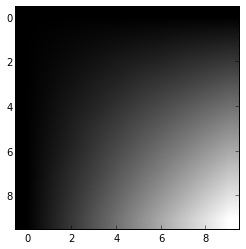

In [43]:
from numpy import *
from pylab import imshow 
image = arange(10)[:,newaxis] * arange(10)[newaxis,:] 
imshow(image) # put the image on the canvas (but doesn't show it yet) 
gray() # map values to grayscale 
show() # display it 
savefig('test.png')  

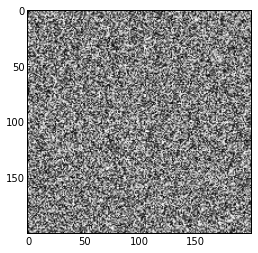

In [44]:
image = random.random((200,200))
imshow(image); show(); savefig("temp.png") 

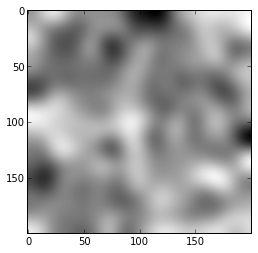

In [45]:
from scipy.ndimage import filters 
smooth = filters.gaussian_filter(image,10.0) 
imshow(smooth); show(); savefig("temp.png") 

You can also make animations.  These work differently in this worksheet and the command line.  From the command line, here is an example:

FPS: 43.5693279038


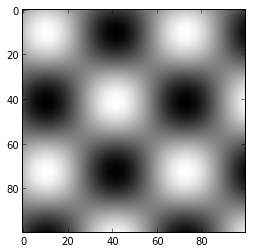

FPS: 43.6437732508


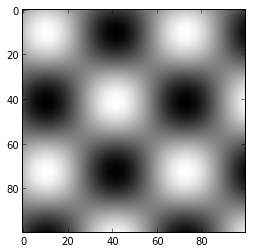

In [47]:
#see www.scipy.org/Cookbook/Matplotlib/Animations

from numpy import *
from pylab import *
import time

ion() # turn on interactive

tstart = time.time()
image = zeros((100,100))
x = linspace(0,10,100)
y = linspace(0,10,100)
image = sin(x)[:,newaxis]*sin(y)[newaxis,:]
im = imshow(image)

n = 500
for i in linspace(0,10,n):
 image = sin(x+i)[:,newaxis]*sin(y+i)[newaxis,:]
 im.set_array(image)
 draw()

print 'FPS:' , n/(time.time()-tstart)

Arrays as Images
================

Python has a lot of facilities for dealing with images.  These are contained in the pylab module and the scipy.ndimage module, among others.  Here is a simple example.

If they don't have the same shape, it's usually an error.

Size Mismatches, Recycling, NewAxis
===================================

If arrays have the same size and shape, then operations between them are parallelized.

They also use C layout internally, so a[0,0] and a[1,0] are further apart in memory than a[0,0] and a[0,1].   How would you know?  Because you can reshape arrays. 

# Data Parallelism

Loops are quite slow in Python.

In [49]:
from pylab import * 
import timeit 
a = randn(1000,1000) 